# function that takes distance to basket as input and returns thrower speed
# 800 ... 39% ... ~1,5m
# 1050 ...  51,3% ... ~2m
# 1200 ... 58,6% ... ~3m
# 1800 ... 87,9% ... ~4,5m

In [4]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def thrower_speed_from_distance_to_basket(distance_to_basket): # single input variable: distance_to_basket [m], float
    
    # distance to basket values range from 0 to 5m
    thrower_speed = 0 # default to zero [unitless], int
    duty_cycle = 0 # default to zero [%], float
    
    ########################################################################
    max_ramp_range_100DC = 5 # derived from testing installed ramp geometry at max thrower speed, [m], float
    ########################################################################

    max_duty_cycle = 100 # constant [%], float
    max_thrower_speed = 2047 # constant [unitless], int

    # duty cycle = (  distance to basket * 100%  ) / tested max range with installed ramp geometry at 100% duty cycle
    duty_cycle = (distance_to_basket*max_duty_cycle)/max_ramp_range_100DC

    # thrower speed = (  calculated duty cycle * maximum possible thrower speed  ) / maximum possible duty cycle
    thrower_speed = int((duty_cycle*max_thrower_speed)/max_duty_cycle) #using int() to ensure saved value is int

    # return computed thrower speed integer
    return thrower_speed # bon voyage, little green ball!

In [5]:
i = 1
number_of_points = 200
thrower_speed_from_distance = pd.DataFrame(columns=['Distance to basket', 'Calculated thrower speed'])

while i < number_of_points:
    
    distance_to_basket = random.uniform(0, 5) # generate random float in range from 0 to 5 [m]
    thrower_speed = thrower_speed_from_distance_to_basket(distance_to_basket)
    
    thrower_speed_from_distance.loc[i] = [distance_to_basket, thrower_speed]

    i += 1

# sort calculated thrower speed values in ascending order
thrower_speed_from_distance = thrower_speed_from_distance.sort_values(by=['Calculated thrower speed'], ascending=True)

thrower_speed_from_distance

,Distance to basket,Calculated thrower speed
9,0.065327,26.0
81,0.074472,30.0
113,0.098299,40.0
157,0.154363,63.0
55,0.232824,95.0
...,...,...
183,4.785828,1959.0
51,4.786031,1959.0
8,4.803987,1966.0
32,4.924494,2016.0


Text(0, 0.5, 'Distance to basket [m]')

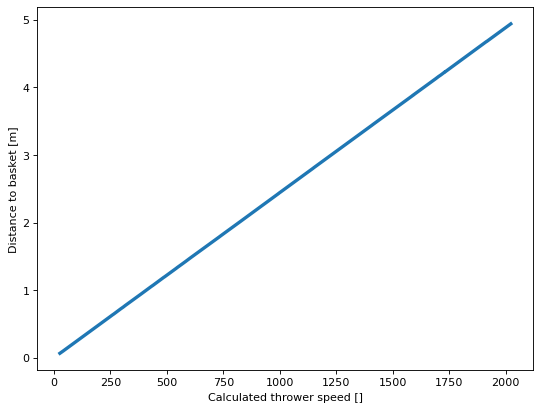

In [6]:
#plot these sorted values
y = thrower_speed_from_distance['Distance to basket']
x = thrower_speed_from_distance['Calculated thrower speed']

figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, linewidth=3)
plt.xlabel('Calculated thrower speed []')
plt.ylabel('Distance to basket [m]')

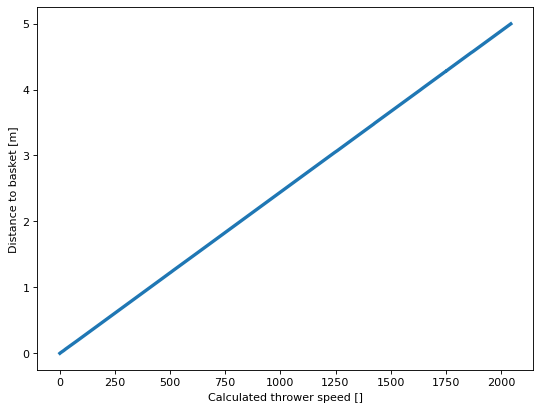

**Allan:** You might need to use a LUT later to calculate the speed based on real world measurements. 5 meters for 100% duty cycle seems too round a number. I would also add an configurable offset. Throwing performance can change from round to round due to rubber deposits on the motor or balls getting dirty.
Also a aspect on throwing is that you might have sideways drift to throwing. This usually happens when the motor is not supported from both sides or if the thrower is mechanically bent in some direction.

The approximate throwing curve:
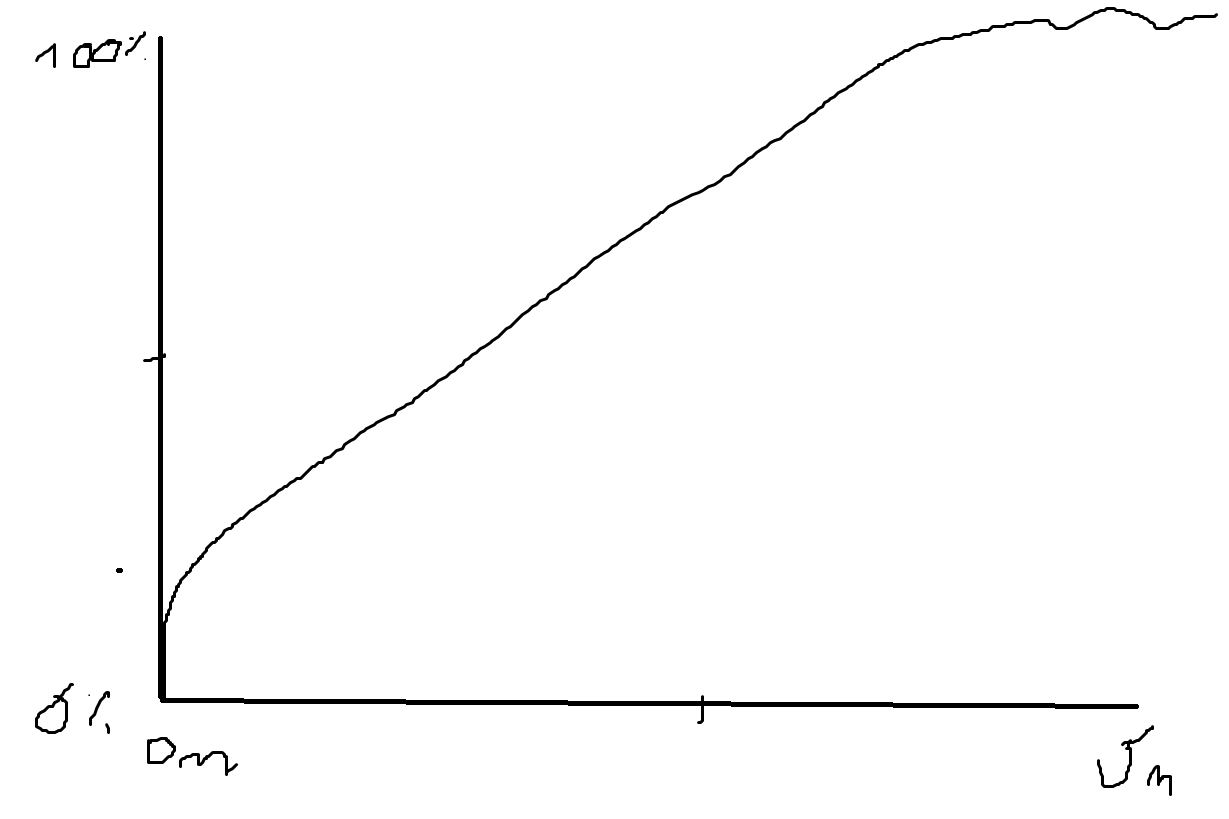